<a href="https://colab.research.google.com/github/VISHAL-099/Colab-files/blob/main/computer_vision_open_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from PIL import Image
import os
# create ImageDataset folder with images name as user.1.x, user.2.x and trainer.yml file
# Path for face image database
path = "/content/Imagedataset"
recognizer = cv2.face.LBPHFaceRecognizer_create()
detector = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml");

In [ ]:
def getImagesAndLabels(path):

    imagePaths = [os.path.join(path,f) for f in os.listdir(path)]
    faceSamples=[]
    ids = []

    for imagePath in imagePaths:
      try:
        PIL_img = Image.open(imagePath).convert('L') # convert it to grayscale
        img_numpy = np.array(PIL_img,'uint8')

        id = int(os.path.split(imagePath)[-1].split(".")[1])
        faces = detector.detectMultiScale(img_numpy)

        for (x,y,w,h) in faces:
            faceSamples.append(img_numpy[y:y+h,x:x+w])
            ids.append(id)
      except :
        pass

    return faceSamples,ids

In [ ]:
print ("\n [INFO] Training faces. It will take a few seconds. Wait ...")
faces,ids = getImagesAndLabels(path)

recognizer.train(faces, np.array(ids))

# Save the model into trainer/trainer.yml
recognizer.write('trainer.yml') # recognizer.save() worked on Mac, but not on Pi

# Print the numer of faces trained and end program
print("\n [INFO] {0} faces trained. Exiting Program".format(len(np.unique(ids))))


 [INFO] Training faces. It will take a few seconds. Wait ...


error: ignored

In [ ]:
# take a test image  and display
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/Imagedataset/dhanush.2.4.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

error: ignored

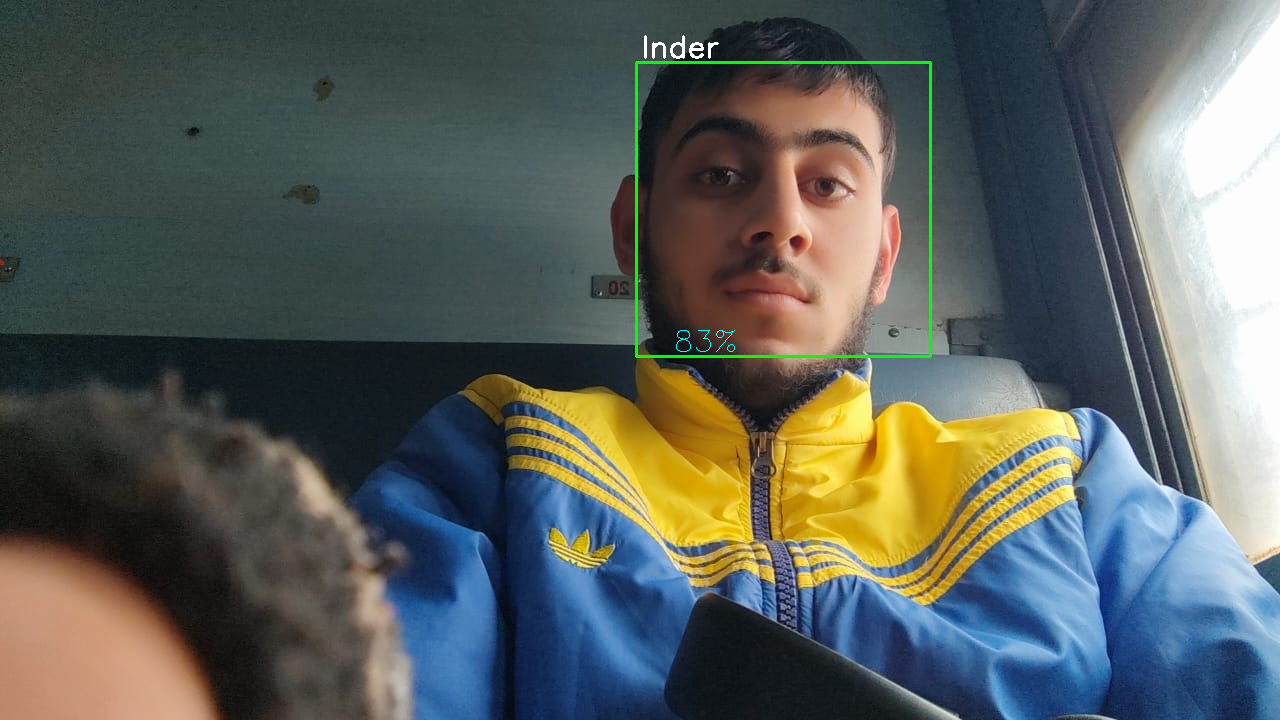

In [ ]:
# take a test image  and display
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import os

testfile  = '/content/Imagedataset/kirti.1.8.jpg'
testfile1 ='/content/Imagedataset/vijay.4.4.jpg'
testfile2 = '/content/Imagedataset/vishal.5.2.jpg'
testfile3 = '/content/Imagedataset/yash.3.7.jpg'
testfile4 = '/content/Imagedataset/dhanush.2.4.jpg'
testfile5 = '/content/Imagedataset/pic.1.jpg'
testfile6 = '/content/Imagedataset/vikash.6.5.jpg'
testfile7 = '/content/Imagedataset/inder.7.1.jpg'
img = cv2.imread(testfile7)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# cv2_imshow(img)

recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('trainer.yml')
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades +  cascadePath);

font = cv2.FONT_HERSHEY_SIMPLEX

id = 0
names = ['None', 'kirti', 'dhanush','yash','vijay','vishal','vikas','Inder']
# predict the user face in test image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor = 1.2,
        minNeighbors = 5

       )
for(x,y,w,h) in faces:

        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

        id, confidence = recognizer.predict(gray[y:y+h,x:x+w])

        # Check if confidence is less them 100 ==> "0" is perfect match
        if (confidence < 100):
            id = names[id]
            confidence = "  {0}%".format(round(100 - confidence))
        else:
            id = "unknown"
            confidence = "  {0}%".format(round(100 - confidence))

        cv2.putText(img, str(id), (x+5,y-5), font, 1, (255,255,255), 2)
        cv2.putText(img, str(confidence), (x+5,y+h-5), font, 1, (255,255,0), 1)
cv2_imshow(img)

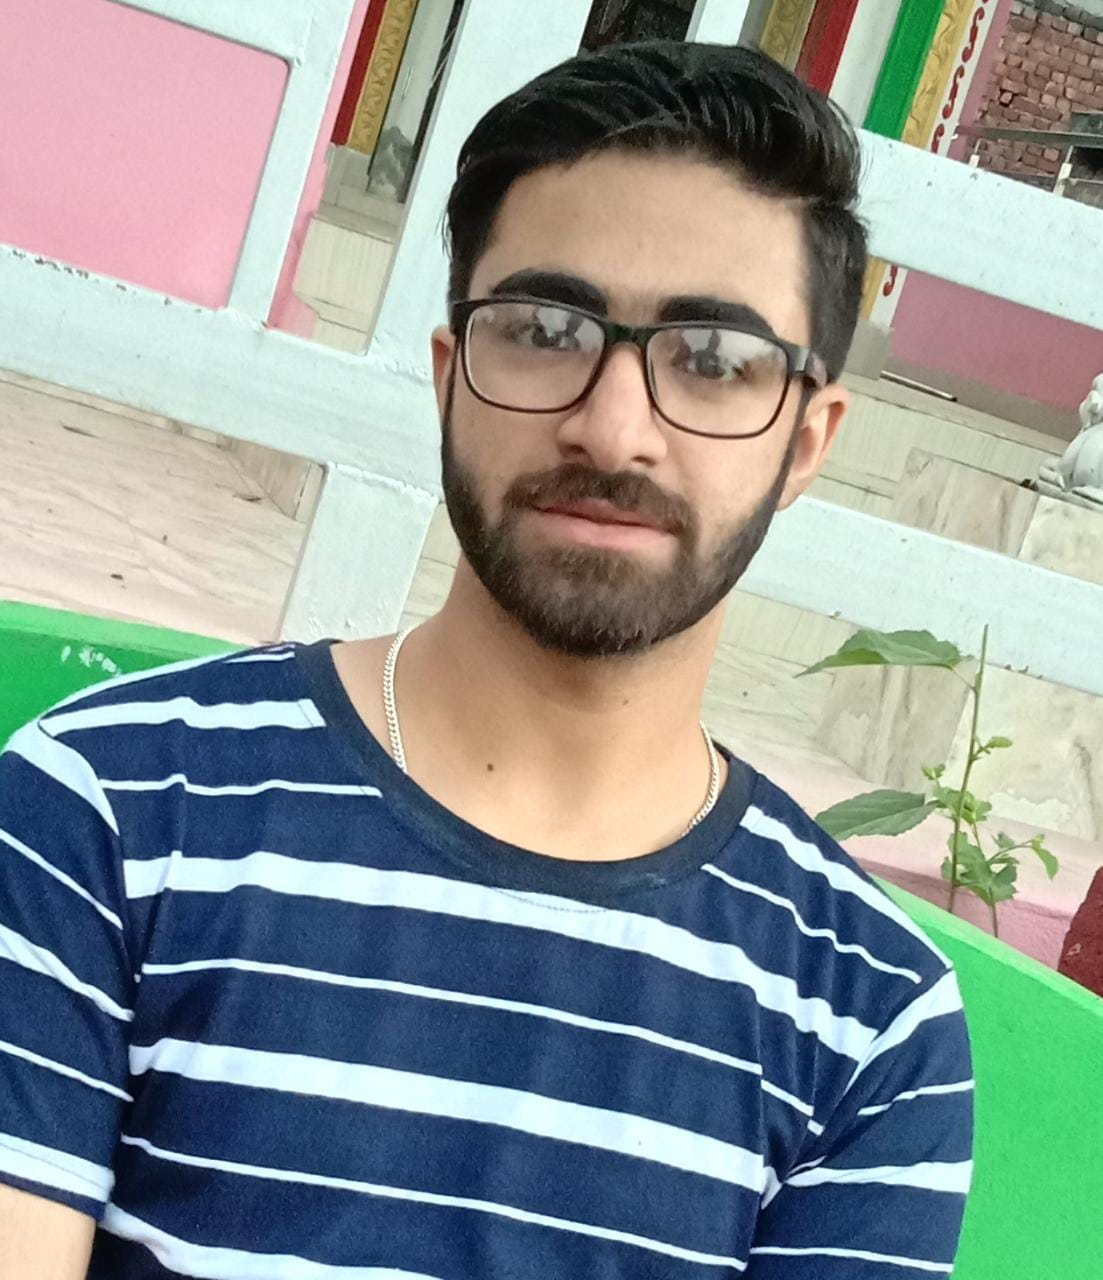

push to cloud vikas3


ValueError: ignored

In [ ]:
# take a test image  and display
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import os
import urllib.request
testfile  = '/content/Imagedataset/kirti.1.8.jpg'
testfile1 ='/content/Imagedataset/vijay.4.4.jpg'
testfile2 = '/content/Imagedataset/vishal.5.2.jpg'
testfile3 = '/content/Imagedataset/yash.3.7.jpg'
testfile4 = '/content/Imagedataset/dhanush.2.4.jpg'
testfile5 = '/content/Imagedataset/pic.1.jpg'
testfile6 = '/content/Imagedataset/vikash.6.5.jpg'
testfile7 = '/content/Imagedataset/inder.7.1.jpg'
img = cv2.imread(testfile6)
cv2_imshow(img)

recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('/content/trainer.yml')
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades +  cascadePath);

font = cv2.FONT_HERSHEY_SIMPLEX

id = 0
names = ['None', 'kirti', 'dhanush','yash','vijay','vishal','vikas','Inder']
font = cv2.FONT_HERSHEY_SIMPLEX
url = "https://aimlface23.glitch.me/storedata?uname="

# # predict the user face in test image
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# #cv2_imshow(gray)
# faces = detector.detectMultiScale( gray, scaleFactor = 1.2, minNeighbors = 5  )

# for all detected faces
for x,y,w,h in faces :
  url = "vishal---aimlface-cv2023.glitch.me/storedata?uname="
  cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

  # check the face with trainer.yml file and print the name /id as per result
  id, confidence = recognizer.predict(gray[y:y+h,x:x+w])
  if (confidence < 100):
    str1 = str(int(confidence)) +'%'+ " "+ names[id]
    ###########
    print ('push to cloud ' +  names[id]  +str(int(confidence)))
    url= url + names[id] + '&matching='  + str(int(confidence)) +  '&rtime=29-april-23'
    urllib.request.urlopen(url)
    print(url)
    ##########
  else :
    str1 = "unknown "
  cv2.putText( img, str( str1 ) ,(x,y) , font , .5, (255,0,0))

  st1 = ''
cv2_imshow(img)

In [ ]:
import urllib.request

In [ ]:
from datetime import datetime
print(datetime.now())
#dd-mon-yyyy

2023-05-08 06:59:03.899824


In [ ]:
print(id, confidence)


3 2.7022659194942453


# Webcam


In [ ]:
import cv2
import numpy as np
import os

recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('/content/trainer.yml')
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades +  cascadePath);

font = cv2.FONT_HERSHEY_SIMPLEX

id = 0
names = ['None', 'kirti', 'dhanush','yash','vijay','vishal','vikas','Inder']

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='/photo7.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to /photo7.jpg


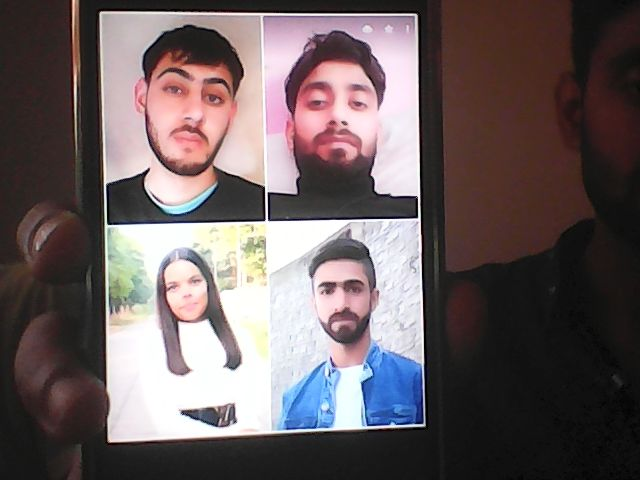

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
  cv2_imshow(cv2.imread("/photo7.jpg"))

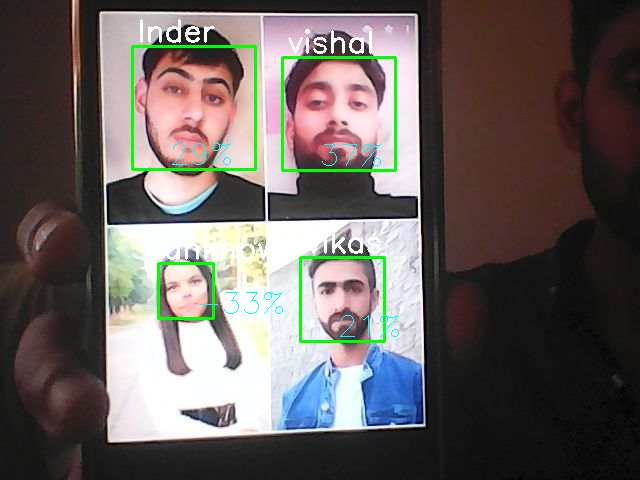

In [ ]:
# take a test image  and display
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import os

testfile  = '/photo7.jpg'

img = cv2.imread(testfile)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# cv2_imshow(img)

recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('/content/trainer.yml')
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades +  cascadePath);

font = cv2.FONT_HERSHEY_SIMPLEX

id = 0
names = ['None', 'kirti', 'dhanush','yash','vijay','vishal','vikas','Inder']


# predict the user face in test image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor = 1.2,
        minNeighbors = 10

       )
for(x,y,w,h) in faces:

        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

        id, confidence = recognizer.predict(gray[y:y+h,x:x+w])

        # Check if confidence is less them 100 ==> "0" is perfect match
        if (confidence < 100):
            id = names[id]
            confidence = "  {0}%".format(round(100 - confidence))



        else:
            id = "unknown"
            confidence = "  {0}%".format(round(100 - confidence))

        cv2.putText(img, str(id), (x+5,y-5), font, 1, (255,255,255), 2)
        cv2.putText(img, str(confidence), (x+5,y+h-5), font, 1, (255,255,0), 1)
cv2_imshow(img)

In [ ]:
# take a test image  and display
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import os

testfile  = '/photo7.jpg'

img = cv2.imread(testfile)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# cv2_imshow(img)

recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('/content/trainer.yml')
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades +  cascadePath);

font = cv2.FONT_HERSHEY_SIMPLEX
serverurl ="https://aimlface23.glitch.me/storedata?uname="

id = 0
names = ['None', 'kirti', 'dhanush','yash','vijay','vishal','vikas']


# predict the user face in test image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor = 1.2,
        minNeighbors = 10

       )
for(x,y,w,h) in faces:

        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

        id, confidence = recognizer.predict(gray[y:y+h,x:x+w])

        # Check if confidence is less them 100 ==> "0" is perfect match
        if (confidence < 100):
            id = names[id]
            confidence = "  {0}%".format(round(100 - confidence))


            print('push to cloud' + names[id] + str(int(confidence)))
            serverurl= serverurl + names[id] + '&matching =' + str(int(confidence)) +'&rtime=29-april-23'
            print(serverurl)
            else :
               id = "unknown"
               confidence = "  {0}%".format(round(100 - confidence))
               cv2.putText(img, str(id), (x+5,y-5), font, 1, (255,255,255), 2)
               cv2.putText(img, str(confidence), (x+5,y+h-5), font, 1, (255,255,0), 1)
               cv2_imshow(img)

SyntaxError: ignored

In [ ]:
from datetime import datetime
print(datetime.now())

2023-05-03 13:36:16.498926


In [ ]:
#### push data
import urllib.request
url="https://aimlface23.glitch.me/storedata?uname=kumar&matching=40&rtime=28-fab-2022"
urllib.request.urlopen(url)

HTTPError: ignored

In [ ]:
print(id,confidence)

NameError: ignored